Ethan Feldman

Marketing Staff Associate Assignment

Columbia Business School

In [406]:
import os
import time
import datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn-v0_8-white')

In [407]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

In [408]:
import nltk
nltk.download('stopwords')
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
from collections import Counter
from nltk.stem.porter import PorterStemmer

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
DIR = 'C:\Users\uneth\Downloads\FeldmanE_Columbia_Assignment/'

In [411]:
pd.set_option('display.max_columns', None) # I want to see all the columns

survey_raw = pd.read_excel(DIR + "survey_eval_task.xlsx", dtype=str)
survey_questions = survey_raw[:1].copy() # Row 0 contains questions were asked in the survey
survey_raw = survey_raw[2:].reset_index(drop=True) # All other rows are the data

print(survey_raw.shape)

survey_raw.drop(columns='RecordedDate', inplace=True) # RecordedData = EndData
survey_raw

(201, 81)


,StartDate,EndDate,Duration (in seconds),ResponseId,Q291_First Click,Q291_Last Click,Q291_Page Submit,Q291_Click Count,Achap1_text_val,Achap1_text_aro,Achap1_belief,Achap1_val_scale,Achap1_val_cert,Achap1_val_cert_expl,Achap1_aro_scale,Achap1_aro_cert,Achap1_aro_cert_expl,Q184_First Click,Q184_Last Click,Q184_Page Submit,Q184_Click Count,Achap2_val_surprise,Achap2_val_surp_expl,Achap2_aro_surprise,Achap2_aro_surp_expl,Achap2_text_val,Achap2_text_aro,Achap2_belief,Achap2_val_scale,Achap2_val_cert,Achap2_aro_scale,Achap2_aro_cert,Q294_First Click,Q294_Last Click,Q294_Page Submit,Q294_Click Count,Bchap1_text_val,Bchap1_text_aro,Bchap1_belief,Bchap1_val_scale,Bchap1_val_cert,Bchap1_aro_scale,Bchap1_aro_cert,Q305_First Click,Q305_Last Click,Q305_Page Submit,Q305_Click Count,Bchap2_val_surprise,Bchap2_aro_surprise,Bchap2_text_val,Bchap2_text_aro,Bchap2_belief,Bchap2_val_scale,Bchap2_val_cert,Bchap2_aro_scale,Bchap2_aro_cert,genre_1,genre_2,genre_3,genre_4,genre_5,genre_6,genre_7,genre_8,genre_9,genre_10,genre_DO,att_check1,att_check2,comments,StoryA_Chapter1,StoryA_Chapter2,StoryB_Chapter1,StoryB_Chapter2,tasktime,worktimeArray,offTask,onTask,totalOffTask,totalOnTask
0,2025-03-19 12:40:03,2025-03-19 12:48:52,528,R_3RjWGMzoX6FrDEH,6.067,41.207,56.701,3,5,5,I think she opened the door and saw a lot of a...,7,4,I am 50/50 sure because it could go in so many...,7,6,I feel like it is leading up to be exciting,3.884,24.804,34.008,3,7,It was much more exciting than I expected,7,It was more creative than I expected,7,7,I think they will have a tea party and have fu...,6,4,6,4,3.183,28.205,35.503,4,3,4,I think it will be some scary man whom shes ow...,3,4,6,4,2.102,14.444,35.591,3,5,4,5,4,I think they will leave town together,4,5,4,4,3,1,3,1,1,4,4,4,1,4,1|4|6|8|7|9|2|3|5|10,A little child looking into a secret room,A mysterious visitor,na,Sasha‚Äôs small fingers trembled with exciteme...,Sasha felt her excitement bubbling over fear a...,"Evelyn sat awake in the silent house, the cloc...",Evelyn‚Äôs breath caught in her throat as a fi...,3,",3.255",",-6.181",",14.977,9.485,6.249,1.838,5...",-6,502
1,2025-03-19 12:38:23,2025-03-19 12:54:05,941,R_6Q0GM9a5tHZN7bc,0,0,49.966,0,5,6,"In the next chapter, I believe that Alex will ...",5,4,The tone of the writing creates an air of exci...,7,6,The next chapter is the pinnacle because we'll...,0,0,52.802,0,7,"I didn't expect Elena to be a ghost, based on ...",6,"I was surprised Elena was a ghost, but that is...",5,6,"In the next chapter, I would expect Alex to tr...",3,5,5,5,0,0,50.033,0,5,5,"In the next chapter, I would expect Sasha to o...",6,6,6,6,0,0,50.176,0,7,7,6,6,"In the next chapter, Sasha will be drawn back ...",5,4,5,4,2,1,4,2,2,1,2,1,2,4,1|7|3|8|5|2|6|9|4|10,Alex hopes to reunite with his long-lost love ...,Sasha discovers a mysterious door in the attic.,"Typo: dust ""mites"" was written as dust ""motes""","Alex hesitated on his doorstep, the evening dr...","Alex approached the abandoned station, its sil...",Sasha‚Äôs small fingers trembled with exciteme...,"The door remained stubborn at first, but Sasha...",1,",1.358",NaN,",12.991,3.961,5.149,1.288,4...",0,919
2,2025-03-19 12:43:52,2025-03-19 12:54:09,616,R_1N47WwxG8GchoC5,0,0,44.745,0,5,6,I believe the person will enter the room and r...,5,3,I do not know whether this person will be good...,6,5,Because Otis seems like the climax of the story,0,0,46.602,0,6,I was not expecting the words to be so neutral,3,I knew it would be high energy since it was th...,5,6,James will say goodbye and then leave,3,6,6,5,0,0,42.514,0,6,6,She will open the door and it will reveal what...,5,5,7,6,0,0,51.172,0,4,2,3,7,She will tell a trusted person about her exper...,3,2,6,5,2,2,1,1,1,1,1,1,2,1,2|7|8|5|1|9|4|6|10|3,A ghost named James visiting Evelyn in her roo...,A girl named Sasha discovering a ghost mirror ...,NaN,"Evelyn sat awake in the silent house, the cloc...",A shape drifted forward out of the darkness ‚Ä...,Sasha‚Äôs small fingers trembled with excit

In [412]:
# Understanding value prompts
survey_questions.to_dict()

{'StartDate': {0: 'Start Date'},
 'EndDate': {0: 'End Date'},
 'Duration (in seconds)': {0: 'Duration (in seconds)'},
 'RecordedDate': {0: 'Recorded Date'},
 'ResponseId': {0: 'Response ID'},
 'Q291_First Click': {0: 'Timing - First Click'},
 'Q291_Last Click': {0: 'Timing - Last Click'},
 'Q291_Page Submit': {0: 'Timing - Page Submit'},
 'Q291_Click Count': {0: 'Timing - Click Count'},
 'Achap1_text_val': {0: 'Words can be characterized as being different levels of negative or positive. For example, very negative words include "torture" and "mourn," neutral words include "vertical" and "beaver," and very positive words include "vacation" and "happiness."\n\nWhere on the very negative to very positive spectrum do you think the words in the chapter were?'},
 'Achap1_text_aro': {0: 'In addition to being positive or negative, words can also be characterized as being low or high energy. For example, very low energy words include "calm" and "dull," medium energy words include "relationship"

In [413]:
print(survey_raw.columns)

Index(['StartDate', 'EndDate', 'Duration (in seconds)', 'ResponseId',
       'Q291_First Click', 'Q291_Last Click', 'Q291_Page Submit',
       'Q291_Click Count', 'Achap1_text_val', 'Achap1_text_aro',
       'Achap1_belief', 'Achap1_val_scale', 'Achap1_val_cert',
       'Achap1_val_cert_expl', 'Achap1_aro_scale', 'Achap1_aro_cert',
       'Achap1_aro_cert_expl', 'Q184_First Click', 'Q184_Last Click',
       'Q184_Page Submit', 'Q184_Click Count', 'Achap2_val_surprise',
       'Achap2_val_surp_expl', 'Achap2_aro_surprise', 'Achap2_aro_surp_expl',
       'Achap2_text_val', 'Achap2_text_aro', 'Achap2_belief',
       'Achap2_val_scale', 'Achap2_val_cert', 'Achap2_aro_scale',
       'Achap2_aro_cert', 'Q294_First Click', 'Q294_Last Click',
       'Q294_Page Submit', 'Q294_Click Count', 'Bchap1_text_val',
       'Bchap1_text_aro', 'Bchap1_belief', 'Bchap1_val_scale',
       'Bchap1_val_cert', 'Bchap1_aro_scale', 'Bchap1_aro_cert',
       'Q305_First Click', 'Q305_Last Click', 'Q305_Page Subm

In [414]:
# Column data types
survey_raw.dtypes

,0
StartDate,object
EndDate,object
Duration (in seconds),object
ResponseId,object
Q291_First Click,object
...,...
worktimeArray,object
offTask,object
onTask,object
totalOffTask,object


### Cleaning and Data Generation

In [415]:
# Used AI generation tools to assignment data types to the columns.
# Prompt submitted: The current data file has every row as object, write a python script that assigns the correct data type to each column
# Edited GenAI response due to logic errors

# Define column types based on documentation
datetime_cols = ["StartDate", "EndDate"]
int_cols = ["Duration (in seconds)",
            "Q291_Click Count", "Q184_Click Count", "Q294_Click Count", "Q305_Click Count",
            "genre_1", "genre_2", "genre_3", "genre_4", "genre_5",
            "genre_6", "genre_7", "genre_8", "genre_9", "genre_10"]
float_cols = [
    'Q291_First Click', 'Q291_Last Click', 'Q291_Page Submit',
    'Achap1_text_val', 'Achap1_text_aro',
    'Achap1_val_scale', 'Achap1_val_cert',
    'Achap1_aro_scale', 'Achap1_aro_cert',
    'Q184_First Click', 'Q184_Last Click', 'Q184_Page Submit',
    'Achap2_val_surprise', 'Achap2_aro_surprise',
    'Achap2_text_val', 'Achap2_text_aro',
    'Achap2_val_scale', 'Achap2_val_cert',
    'Achap2_aro_scale', 'Achap2_aro_cert',
    'Q294_First Click', 'Q294_Last Click', 'Q294_Page Submit',
    'Bchap1_text_val', 'Bchap1_text_aro',
    'Bchap1_val_scale', 'Bchap1_val_cert',
    'Bchap1_aro_scale', 'Bchap1_aro_cert',
    'Q305_First Click', 'Q305_Last Click', 'Q305_Page Submit',
    'Bchap2_val_surprise', 'Bchap2_aro_surprise',
    'Bchap2_text_val', 'Bchap2_text_aro',
    'Bchap2_val_scale', 'Bchap2_val_cert',
    'Bchap2_aro_scale', 'Bchap2_aro_cert',
    "tasktime", "totalOffTask", "totalOnTask"
]
text_cols = [
    'Achap1_belief', 'Achap1_val_cert_expl', 'Achap1_aro_cert_expl',
    'Achap2_belief', 'Achap2_val_surp_expl', 'Achap2_aro_surp_expl',
    'Bchap1_belief',
    'Bchap2_belief',
    "att_check1", "att_check2", "comments",
    "StoryA_Chapter1", "StoryA_Chapter2", "StoryB_Chapter1", "StoryB_Chapter2"
]
category_cols = ["ResponseId"]
list_cols = ["worktimeArray", "offTask", "onTask"]

# "genre_DO" <- this might be useful for a later analysis, but not right now...

# Apply conversions
for col in datetime_cols:
    survey_raw[col] = pd.to_datetime(survey_raw[col], errors='coerce')

for col in int_cols:
    survey_raw[col] = pd.to_numeric(survey_raw[col], errors='coerce').astype("Int64")

for col in float_cols:
    survey_raw[col] = pd.to_numeric(survey_raw[col], errors='coerce')

for col in category_cols:
    survey_raw[col] = survey_raw[col].astype("category")

for col in list_cols:
    survey_raw[col] = survey_raw[col].apply(lambda x: x.split(",") if isinstance(x, str) else x)

survey_raw.dtypes

,0
StartDate,datetime64[ns]
EndDate,datetime64[ns]
Duration (in seconds),Int64
ResponseId,category
Q291_First Click,float64
...,...
worktimeArray,object
offTask,object
onTask,object
totalOffTask,float64


In [416]:
# Changing totalOffTask to positive
survey_raw['totalOffTask'] = survey_raw['totalOffTask']*-1

### Missing Values

In [417]:
# Any missing values?
print("Number of missing values in each columns:")
survey_raw.isnull().sum().sort_values(ascending=False)

Number of missing values in each columns:


,0
comments,89
offTask,62
Achap1_text_val,2
StartDate,1
Q291_First Click,1
...,...
StoryB_Chapter2,1
worktimeArray,1
onTask,1
totalOffTask,1


In [418]:
# It looks like rows 6 and 200 are missing values from each other
survey_raw[survey_raw.isnull().sum(axis=1) >= 3]

,StartDate,EndDate,Duration (in seconds),ResponseId,Q291_First Click,Q291_Last Click,Q291_Page Submit,Q291_Click Count,Achap1_text_val,Achap1_text_aro,Achap1_belief,Achap1_val_scale,Achap1_val_cert,Achap1_val_cert_expl,Achap1_aro_scale,Achap1_aro_cert,Achap1_aro_cert_expl,Q184_First Click,Q184_Last Click,Q184_Page Submit,Q184_Click Count,Achap2_val_surprise,Achap2_val_surp_expl,Achap2_aro_surprise,Achap2_aro_surp_expl,Achap2_text_val,Achap2_text_aro,Achap2_belief,Achap2_val_scale,Achap2_val_cert,Achap2_aro_scale,Achap2_aro_cert,Q294_First Click,Q294_Last Click,Q294_Page Submit,Q294_Click Count,Bchap1_text_val,Bchap1_text_aro,Bchap1_belief,Bchap1_val_scale,Bchap1_val_cert,Bchap1_aro_scale,Bchap1_aro_cert,Q305_First Click,Q305_Last Click,Q305_Page Submit,Q305_Click Count,Bchap2_val_surprise,Bchap2_aro_surprise,Bchap2_text_val,Bchap2_text_aro,Bchap2_belief,Bchap2_val_scale,Bchap2_val_cert,Bchap2_aro_scale,Bchap2_aro_cert,genre_1,genre_2,genre_3,genre_4,genre_5,genre_6,genre_7,genre_8,genre_9,genre_10,genre_DO,att_check1,att_check2,comments,StoryA_Chapter1,StoryA_Chapter2,StoryB_Chapter1,StoryB_Chapter2,tasktime,worktimeArray,offTask,onTask,totalOffTask,totalOnTask
6,2025-03-19 12:37:32,2025-03-19 12:59:03,1290,R_5zASEiKQNqXuihP,NaN,NaN,NaN,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
200,NaT,NaT,<NA>,NaN,0.0,0.0,58.372,0,2.0,6.0,The last sentence seems to forecast what's com...,2.0,3.0,"As above, the last sentence sets the tone for ...",6.0,4.0,"Again, the tension is ramping up. It's possibl...",0.0,0.0,82.556,0,2.0,She seems a little less horrified and a little...,5.0,She sort of went back to her normal routine di...,3.0,5.0,At this point Mira seems to be taking on an in...,3.0,3.0,5.0,4.0,0.0,0.0,43.729,0,3.0,6.0,I went too high on the last one. I think there...,5.0,5.0,5.0,5.0,0.0,0.0,35.669,0,4.0,3.0,6.0,4.0,I'm having a really hard time here. I don't kn...,3.0,7.0,5.0,5.0,1,4,1,1,1,1,2,1,1,2,8|4|9|1|5|10|6|3|2|7,It was about a woman's diary writing its own e...,It was about an odd note being left by a long ...,I didn't experience any issues to speak of,Mira fumbled for the light switch and flipped ...,Mira spent the next day in a haze of half-form...,"Evelyn sat awake in the silent house, the cloc...",Evelyn‚Äôs breath caught in her throat as a fi...,1.0,"[ , 1.331]","[, -9.307]","[ , 3.042, 10.897, 6.986, 3....",9.0,1705.0


In [419]:
# It seems like row 6 and 200 are missing the same data from each other,
# probably the same response but a data input error
survey_raw.iloc[6] = survey_raw.iloc[6].combine_first(survey_raw.iloc[200])
survey_raw.drop(200, inplace=True)

In [420]:
# There seems to also be a typo in row 7
# Oringially it had an "I", so I'm assuming they meant 1
print(survey_raw.columns[survey_raw.isnull().any()].tolist())
survey_raw.loc[survey_raw['Achap1_text_val'].isnull()]

['Achap1_text_val', 'comments', 'offTask']


,StartDate,EndDate,Duration (in seconds),ResponseId,Q291_First Click,Q291_Last Click,Q291_Page Submit,Q291_Click Count,Achap1_text_val,Achap1_text_aro,Achap1_belief,Achap1_val_scale,Achap1_val_cert,Achap1_val_cert_expl,Achap1_aro_scale,Achap1_aro_cert,Achap1_aro_cert_expl,Q184_First Click,Q184_Last Click,Q184_Page Submit,Q184_Click Count,Achap2_val_surprise,Achap2_val_surp_expl,Achap2_aro_surprise,Achap2_aro_surp_expl,Achap2_text_val,Achap2_text_aro,Achap2_belief,Achap2_val_scale,Achap2_val_cert,Achap2_aro_scale,Achap2_aro_cert,Q294_First Click,Q294_Last Click,Q294_Page Submit,Q294_Click Count,Bchap1_text_val,Bchap1_text_aro,Bchap1_belief,Bchap1_val_scale,Bchap1_val_cert,Bchap1_aro_scale,Bchap1_aro_cert,Q305_First Click,Q305_Last Click,Q305_Page Submit,Q305_Click Count,Bchap2_val_surprise,Bchap2_aro_surprise,Bchap2_text_val,Bchap2_text_aro,Bchap2_belief,Bchap2_val_scale,Bchap2_val_cert,Bchap2_aro_scale,Bchap2_aro_cert,genre_1,genre_2,genre_3,genre_4,genre_5,genre_6,genre_7,genre_8,genre_9,genre_10,genre_DO,att_check1,att_check2,comments,StoryA_Chapter1,StoryA_Chapter2,StoryB_Chapter1,StoryB_Chapter2,tasktime,worktimeArray,offTask,onTask,totalOffTask,totalOnTask
7,2025-03-19 12:44:34,2025-03-19 13:03:21,1126,R_7dagauvryAXsAzT,2.583,6.327,91.347,3,NaN,7.0,Evelyn will come face to face with the source ...,2.0,7.0,I am certain because the chapter sets a strong...,6.0,2.0,This is because the first chapter effectively ...,3.079,7.991,31.601,3,4.0,While the suspenseful and negative tone of the...,3.0,While I anticipated high energy due to the sus...,7.0,6.0,"Based on the tender reunion in this chapter, I...",6.0,3.0,6.0,6.0,2.545,8.088,35.1,4,3.0,7.0,I believe the next chapter might focus on Mira...,3.0,6.0,3.0,6.0,5.226,15.722,37.037,4,2.0,3.0,3.0,6.0,"I believe Mira will stay awake as planned, att...",3.0,2.0,6.0,6.0,2,3,2,2,2,2,3,3,2,2,8|9|1|3|7|4|6|5|2|10,"The first story revolved around Evelyn, who fo...","The second story followed Mira, a young girl w...",none,"Evelyn sat awake in the silent house, the cloc...",Evelyn‚Äôs breath caught in her throat as a fi...,Mira fumbled for the light switch and flipped ...,Mira forced herself to take a deep breath. ‚Äú...,3.0,"[ , 3.48]","[, -8.543, -1.779, -0.85, -1.381, -82.237, -3....","[ , 4.38, 5.523, 3.564, 0.77...",634.0,543.0


In [421]:
survey_raw['Achap1_text_val'][7] = 1

<ipython-input-421-f3f13c5c8a04>:1: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  survey_raw['Achap1_text_val'][7] = 1
<ipython-input-421-f3f13c5c8a04>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataF

In [422]:
# Any duplicate responses?
survey_raw[survey_raw.duplicated(['ResponseId'])]

,StartDate,EndDate,Duration (in seconds),ResponseId,Q291_First Click,Q291_Last Click,Q291_Page Submit,Q291_Click Count,Achap1_text_val,Achap1_text_aro,Achap1_belief,Achap1_val_scale,Achap1_val_cert,Achap1_val_cert_expl,Achap1_aro_scale,Achap1_aro_cert,Achap1_aro_cert_expl,Q184_First Click,Q184_Last Click,Q184_Page Submit,Q184_Click Count,Achap2_val_surprise,Achap2_val_surp_expl,Achap2_aro_surprise,Achap2_aro_surp_expl,Achap2_text_val,Achap2_text_aro,Achap2_belief,Achap2_val_scale,Achap2_val_cert,Achap2_aro_scale,Achap2_aro_cert,Q294_First Click,Q294_Last Click,Q294_Page Submit,Q294_Click Count,Bchap1_text_val,Bchap1_text_aro,Bchap1_belief,Bchap1_val_scale,Bchap1_val_cert,Bchap1_aro_scale,Bchap1_aro_cert,Q305_First Click,Q305_Last Click,Q305_Page Submit,Q305_Click Count,Bchap2_val_surprise,Bchap2_aro_surprise,Bchap2_text_val,Bchap2_text_aro,Bchap2_belief,Bchap2_val_scale,Bchap2_val_cert,Bchap2_aro_scale,Bchap2_aro_cert,genre_1,genre_2,genre_3,genre_4,genre_5,genre_6,genre_7,genre_8,genre_9,genre_10,genre_DO,att_check1,att_check2,comments,StoryA_Chapter1,StoryA_Chapter2,StoryB_Chapter1,StoryB_Chapter2,tasktime,worktimeArray,offTask,onTask,totalOffTask,totalOnTask


### Average Valence and Arousal Stats

In [423]:
# Average val and aro stats
survey_raw['avg_val'] = survey_raw[['Achap1_text_val', 'Achap2_text_val', 'Bchap1_text_val', 'Bchap2_text_val']].mean(axis=1)
survey_raw['avg_aro'] = survey_raw[['Achap1_text_aro', 'Achap2_text_aro', 'Bchap1_text_aro', 'Bchap2_text_aro']].mean(axis=1)

survey_raw['avg_val_cert'] = survey_raw[['Achap1_val_cert', 'Achap2_val_cert', 'Bchap1_val_cert', 'Bchap2_val_cert']].mean(axis=1)
survey_raw['avg_aro_cert'] = survey_raw[['Achap1_aro_cert', 'Achap2_aro_cert', 'Bchap1_aro_cert', 'Bchap2_aro_cert']].mean(axis=1)

survey_raw['avg_val_surprise'] = survey_raw[['Achap2_val_surprise', 'Bchap2_val_surprise']].mean(axis=1)
survey_raw['avg_aro_surprise'] = survey_raw[['Achap2_aro_surprise', 'Bchap2_aro_surprise']].mean(axis=1)

### Times Distracted

In [424]:
survey_raw['times_distracted'] = survey_raw['offTask'].apply(lambda x: len(x) - 1 if isinstance(x, list) else 0)
survey_raw[['offTask', 'times_distracted']]

,offTask,times_distracted
0,"[, -6.181]",1
1,NaN,0
2,NaN,0
3,NaN,0
4,"[, -27.082]",1
...,...,...
195,"[, -6.5]",1
196,"[, -7.814, -211.011, -2.849]",3
197,"[, -0.744, -1.113, -4.666, -5.959, -74.399, -5...",10
198,"[, -206.741]",1


### Prediction Difference

In [425]:
# *chap1_*_scale (prediction) - *chap2_text_* (actual) = prediction difference
survey_raw['A_prediction_val_dif'] = survey_raw['Achap1_val_scale'] - survey_raw['Achap2_text_val']
survey_raw['B_prediction_val_dif'] = survey_raw['Bchap1_val_scale'] - survey_raw['Bchap2_text_val']

survey_raw['A_prediction_aro_dif'] = survey_raw['Achap1_aro_scale'] - survey_raw['Achap2_text_aro']
survey_raw['B_prediction_aro_dif'] = survey_raw['Bchap1_aro_scale'] - survey_raw['Bchap2_text_aro']

survey_raw['avg_prediction_val_dif'] = survey_raw[['A_prediction_val_dif', 'B_prediction_val_dif']].mean(axis=1)
survey_raw['avg_prediction_aro_dif'] = survey_raw[['A_prediction_aro_dif', 'B_prediction_aro_dif']].mean(axis=1)

In [426]:
calculated_cols = ['avg_val', 'avg_aro',
                   'avg_val_cert', 'avg_aro_cert',
                   'avg_val_surprise', 'avg_aro_surprise',
                   'times_distracted',
                   'A_prediction_val_dif', 'B_prediction_val_dif',
                   'A_prediction_aro_dif', 'B_prediction_aro_dif',
                   'avg_prediction_val_dif', 'avg_prediction_aro_dif'
                   ]

### Converting Text to 1-Hot Encoding

Used the help of ChatGPT and StackExchange (logistical revisions) to covert text to 1-hot encoding efficiently.

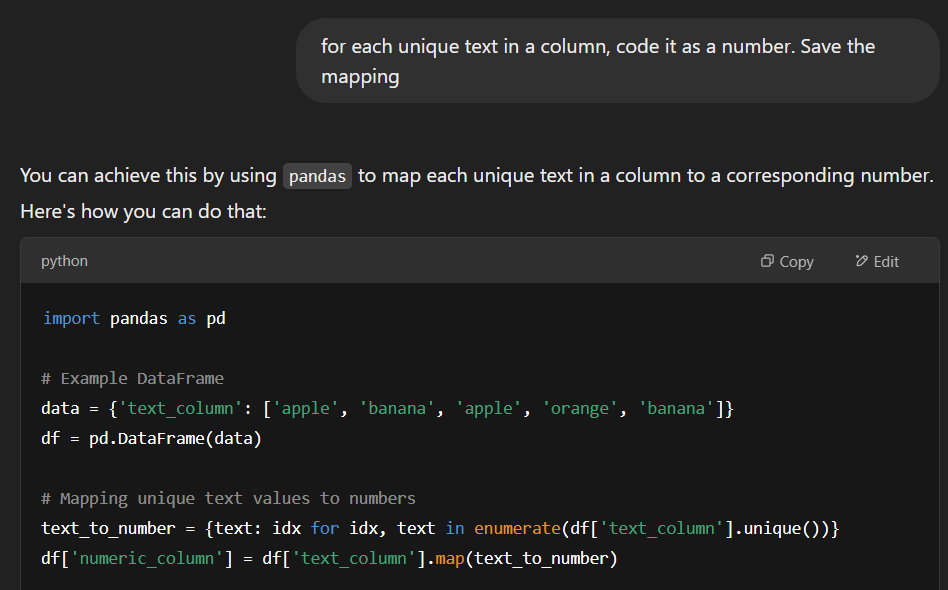

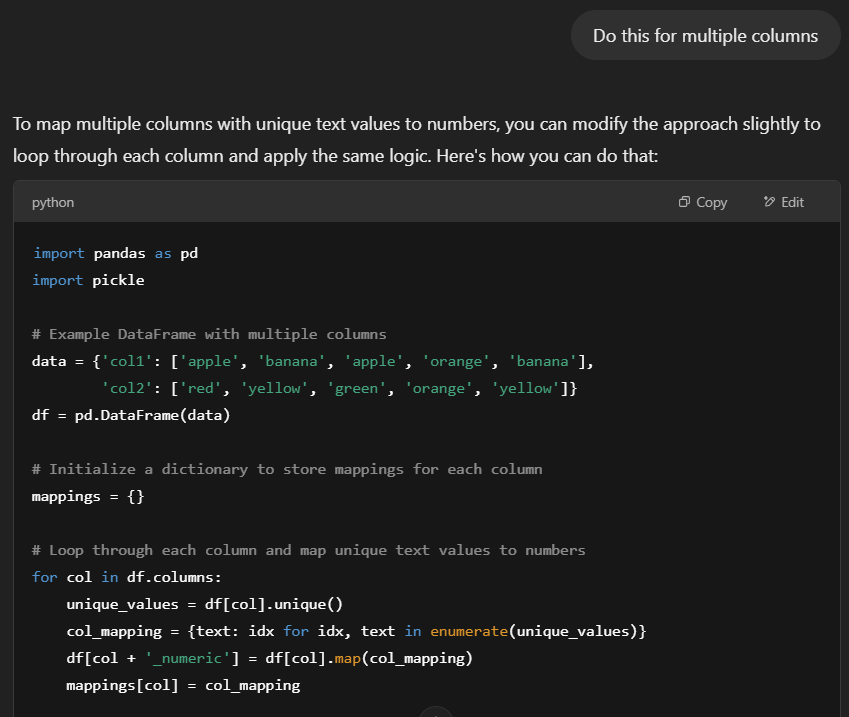

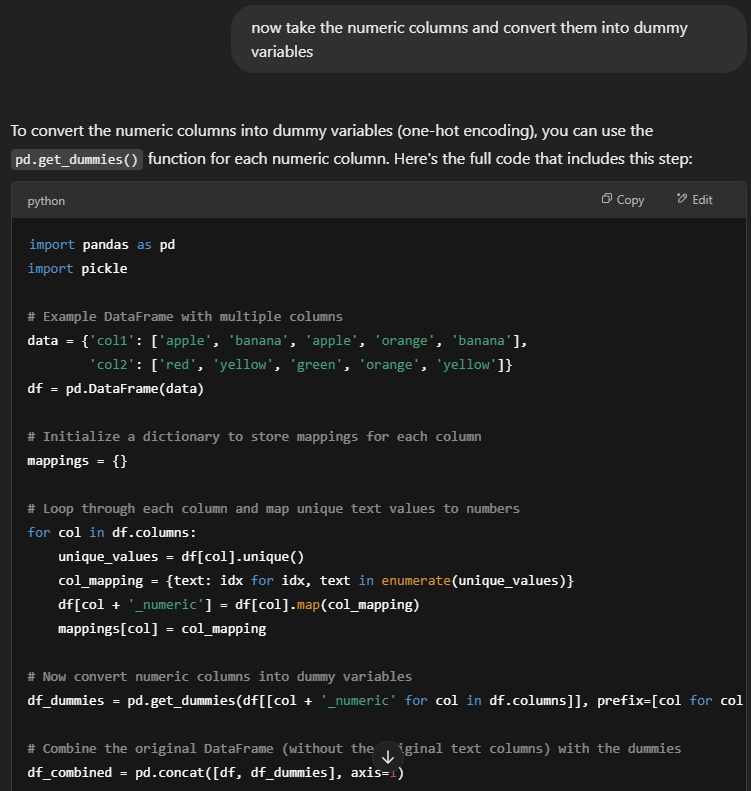

In [427]:
# Converting chapters to numeric variables and save the mapping

# Track the change: create a dictionary to map new column names to original values
chapter_column_mapping = {}

# Loop through each column and map unique text values to numbers
for col in ['StoryA_Chapter1',	'StoryA_Chapter2',	'StoryB_Chapter1',	'StoryB_Chapter2']:
    unique_values = survey_raw[col].unique()
    col_mapping = {text: idx for idx, text in enumerate(unique_values)}
    survey_raw[col + '_numeric'] = survey_raw[col].map(col_mapping)
    chapter_column_mapping[col] = col_mapping


# Converting numeric chapters to dummy variables
df_chapter_dummies = pd.get_dummies(survey_raw[['StoryA_Chapter1_numeric',	'StoryA_Chapter2_numeric',	'StoryB_Chapter1_numeric',	'StoryB_Chapter2_numeric']].astype(str), prefix=['StoryA_Chapter1',	'StoryA_Chapter2',	'StoryB_Chapter1',	'StoryB_Chapter2'])
df_chapter_dummies_cols = df_chapter_dummies.columns.to_list()
df_chapter_dummies

,StoryA_Chapter1_0,StoryA_Chapter1_1,StoryA_Chapter1_2,StoryA_Chapter1_3,StoryA_Chapter2_0,StoryA_Chapter2_1,StoryA_Chapter2_2,StoryA_Chapter2_3,StoryA_Chapter2_4,StoryA_Chapter2_5,StoryA_Chapter2_6,StoryA_Chapter2_7,StoryB_Chapter1_0,StoryB_Chapter1_1,StoryB_Chapter1_2,StoryB_Chapter1_3,StoryB_Chapter2_0,StoryB_Chapter2_1,StoryB_Chapter2_2,StoryB_Chapter2_3,StoryB_Chapter2_4,StoryB_Chapter2_5,StoryB_Chapter2_6,StoryB_Chapter2_7
0,True,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False
1,False,True,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False
2,False,False,True,False,False,False,True,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False
3,False,True,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False
4,False,False,False,True,False,False,False,False,True,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False
196,True,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False,True,False,False,False,False,False,False,False
197,False,True,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False
198,False,False,True,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,True,False,False,False


In [428]:
df_chapter_dummies_cols

['StoryA_Chapter1_0',
 'StoryA_Chapter1_1',
 'StoryA_Chapter1_2',
 'StoryA_Chapter1_3',
 'StoryA_Chapter2_0',
 'StoryA_Chapter2_1',
 'StoryA_Chapter2_2',
 'StoryA_Chapter2_3',
 'StoryA_Chapter2_4',
 'StoryA_Chapter2_5',
 'StoryA_Chapter2_6',
 'StoryA_Chapter2_7',
 'StoryB_Chapter1_0',
 'StoryB_Chapter1_1',
 'StoryB_Chapter1_2',
 'StoryB_Chapter1_3',
 'StoryB_Chapter2_0',
 'StoryB_Chapter2_1',
 'StoryB_Chapter2_2',
 'StoryB_Chapter2_3',
 'StoryB_Chapter2_4',
 'StoryB_Chapter2_5',
 'StoryB_Chapter2_6',
 'StoryB_Chapter2_7']

In [429]:
chapter_column_mapping

{'StoryA_Chapter1': {'Sasha‚Äôs small fingers trembled with excitement as she peeled away another strip of the faded wallpaper. She had discovered the corner of a door behind the peeling paper in the attic last week, and today she could no longer resist exploring further. With each tug, more of the wooden door was revealed, along with an old-fashioned keyhole that seemed to wink at her in the dim attic light. She wasn‚Äôt supposed to play up here alone, but something about the hidden door was too intriguing ‚Äî almost as if it was calling her.<br><br>\nAs thunder rumbled outside, Sasha pressed her ear against the cool, dusty wood. At first, she heard nothing but the thud of her own heartbeat. Then, ever so faintly, she caught what sounded like a whisper: her own name. Sasha‚Äôs breath hitched. She glanced over her shoulder, half expecting to find her older brother playing a prank, but the attic was empty except for shadows. Gathering her courage, she nudged the door. It didn‚Äôt budge,

In [430]:
survey_raw = pd.concat([survey_raw, df_chapter_dummies], axis=1)

### Exporting Data

In [431]:
# Export for STATA (just the numeric data)
survey_raw[datetime_cols + int_cols + float_cols + calculated_cols + df_chapter_dummies_cols].to_excel(DIR + "survey_eval_task_cleaned.xlsx", index=False)

# Plots

### Date
Testing plots, doesn't show up in report.

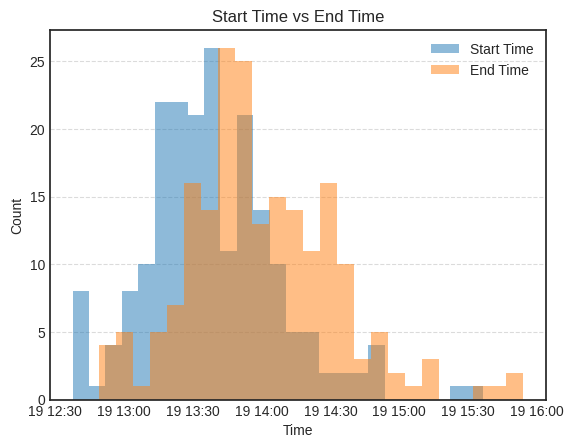

In [432]:
# StartDate vs EndDate
# Easier to get this plot in python
plt.hist(survey_raw['StartDate'], bins=25, alpha=0.5, label='Start Time')
plt.hist(survey_raw['EndDate'], bins=25, alpha=0.5, label='End Time')

plt.legend(loc='upper right')
plt.title("Start Time vs End Time")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.ylabel("Count")
plt.xlabel("Time")
plt.show()

# Seems like the study was done in the afternoon all on the same day

### Declining Valence and Arousal

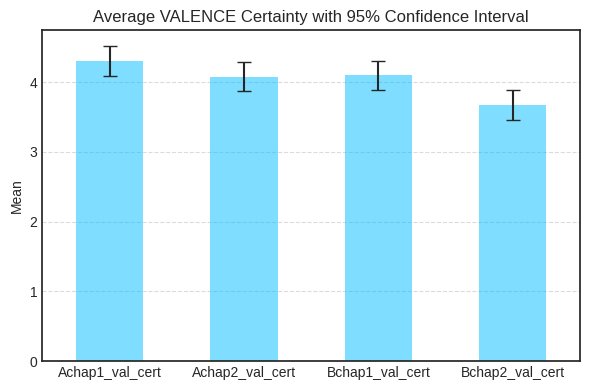

In [433]:
means = survey_raw[['Achap1_val_cert', 'Achap2_val_cert', 'Bchap1_val_cert', 'Bchap2_val_cert']].mean()
sems = survey_raw[['Achap1_val_cert', 'Achap2_val_cert', 'Bchap1_val_cert', 'Bchap2_val_cert']].sem()
CI95 = sems * 1.96  # 95% confidence interval

plt.figure(figsize=(6, 4))
means.plot(kind='bar', yerr=CI95, capsize=5, color='deepskyblue', alpha=0.5)

plt.ylabel('Mean')
plt.title('Average VALENCE Certainty with 95% Confidence Interval')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

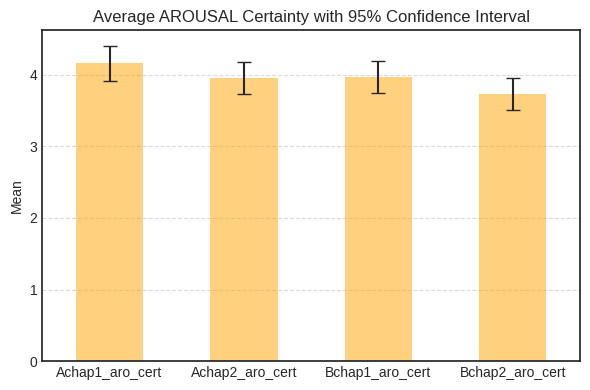

In [434]:
means = survey_raw[['Achap1_aro_cert', 'Achap2_aro_cert', 'Bchap1_aro_cert', 'Bchap2_aro_cert']].mean()
sems = survey_raw[['Achap1_aro_cert', 'Achap2_aro_cert', 'Bchap1_aro_cert', 'Bchap2_aro_cert']].sem()
CI95 = sems * 1.96  # 95% confidence interval

plt.figure(figsize=(6, 4))
means.plot(kind='bar', yerr=CI95, capsize=5, color='orange', alpha=0.5)

plt.ylabel('Mean')
plt.title('Average AROUSAL Certainty with 95% Confidence Interval')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

## Correlations

In [435]:
# Correlation between the features
def get_corrplot(cor, size, title="Corr Plot\n", annotate=False):
    fig, ax = plt.subplots(figsize=size)
    plt.title(title)
    sns.heatmap(cor, xticklabels=True, yticklabels=True, cmap=sns.diverging_palette(220, 10, as_cmap=True), square=True, ax=ax, annot=annotate, fmt=".1f", linewidth=.5)
    ax.get_figure().tight_layout()
    plt.show()

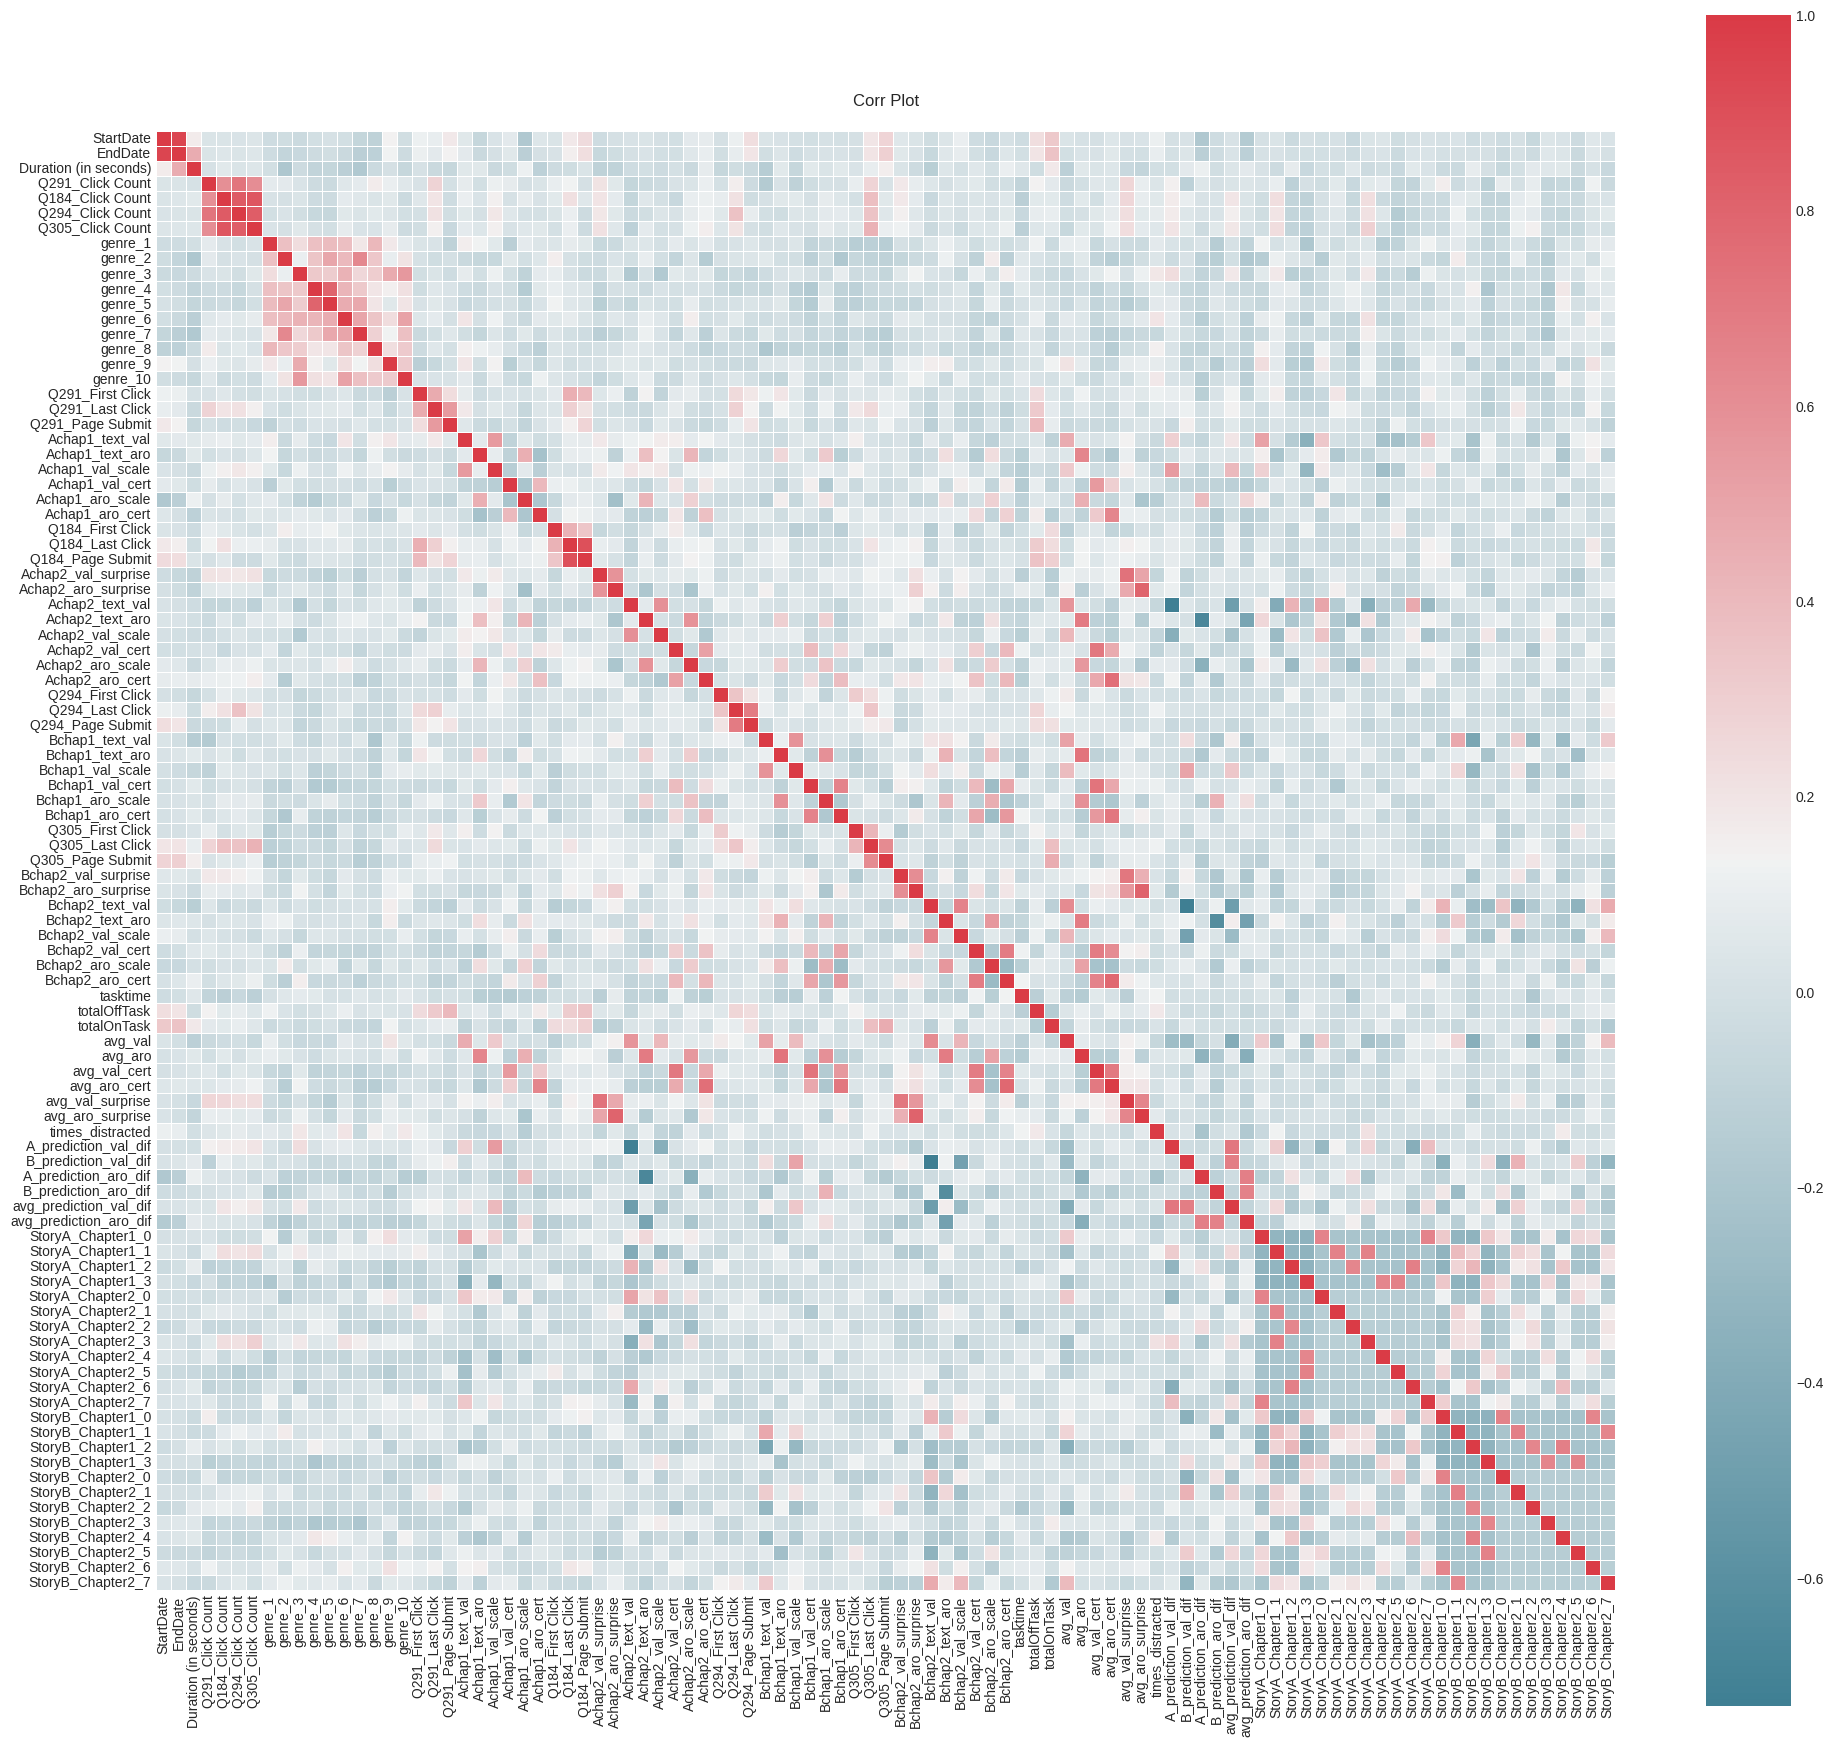

In [436]:
get_corrplot(survey_raw[datetime_cols + int_cols + float_cols + calculated_cols + df_chapter_dummies_cols].corr(method='pearson'), (20,18))

### Certainty Static Correlations

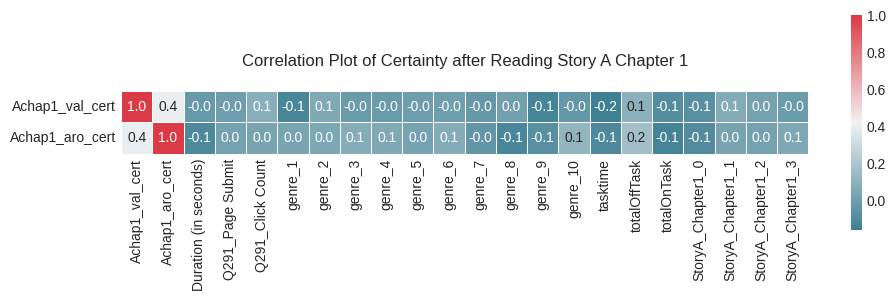

In [437]:
Achap1_cert_static_factors = [
    'Achap1_val_cert', 'Achap1_aro_cert',

    "Duration (in seconds)",

    'Q291_Page Submit', 'Q291_Click Count',

    "genre_1", "genre_2", "genre_3", "genre_4", "genre_5",
    "genre_6", "genre_7", "genre_8", "genre_9", "genre_10",

    "tasktime", 'totalOffTask', 'totalOnTask',

    'StoryA_Chapter1_0', 'StoryA_Chapter1_1',
    'StoryA_Chapter1_2', 'StoryA_Chapter1_3',

]

title = "Correlation Plot of Certainty after Reading Story A Chapter 1\n"

get_corrplot(survey_raw[Achap1_cert_static_factors].corr(method='pearson').iloc[0:2], (10,3), title, True)

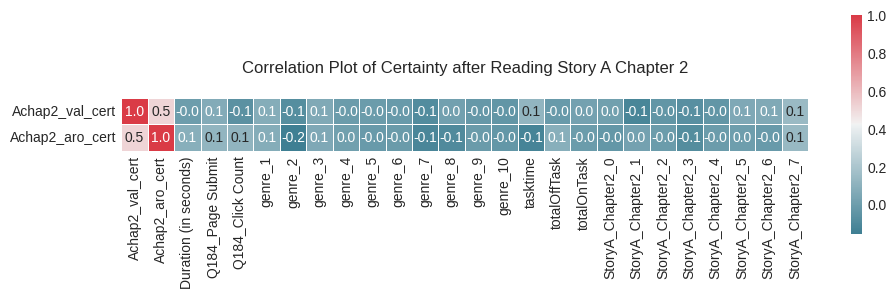

In [438]:
Achap2_cert_static_factors = [
    'Achap2_val_cert', 'Achap2_aro_cert',

    "Duration (in seconds)",

    'Q184_Page Submit', 'Q184_Click Count',

    "genre_1", "genre_2", "genre_3", "genre_4", "genre_5",
    "genre_6", "genre_7", "genre_8", "genre_9", "genre_10",

    "tasktime", 'totalOffTask', 'totalOnTask',

    'StoryA_Chapter2_0',
    'StoryA_Chapter2_1',
    'StoryA_Chapter2_2',
    'StoryA_Chapter2_3',
    'StoryA_Chapter2_4',
    'StoryA_Chapter2_5',
    'StoryA_Chapter2_6',
    'StoryA_Chapter2_7',

]

title = "Correlation Plot of Certainty after Reading Story A Chapter 2\n"

get_corrplot(survey_raw[Achap2_cert_static_factors].corr(method='pearson').iloc[0:2], (10,3), title, True)

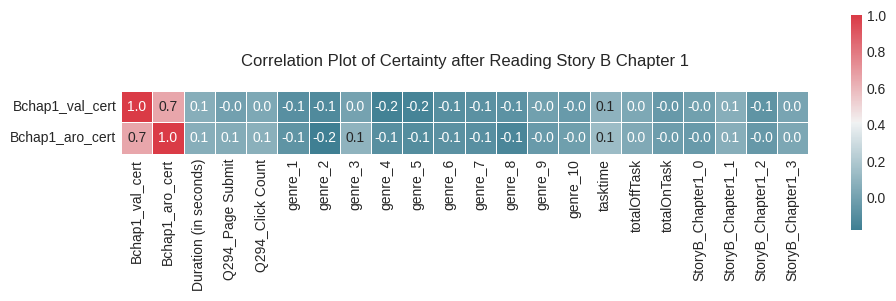

In [439]:
Bchap1_cert_static_factors = [
    'Bchap1_val_cert', 'Bchap1_aro_cert',

    "Duration (in seconds)",

    'Q294_Page Submit', 'Q294_Click Count',

    "genre_1", "genre_2", "genre_3", "genre_4", "genre_5",
    "genre_6", "genre_7", "genre_8", "genre_9", "genre_10",

    "tasktime", 'totalOffTask', 'totalOnTask',

    'StoryB_Chapter1_0',
    'StoryB_Chapter1_1',
    'StoryB_Chapter1_2',
    'StoryB_Chapter1_3',

]

title = "Correlation Plot of Certainty after Reading Story B Chapter 1\n"

get_corrplot(survey_raw[Bchap1_cert_static_factors].corr(method='pearson').iloc[0:2], (10,3), title, True)

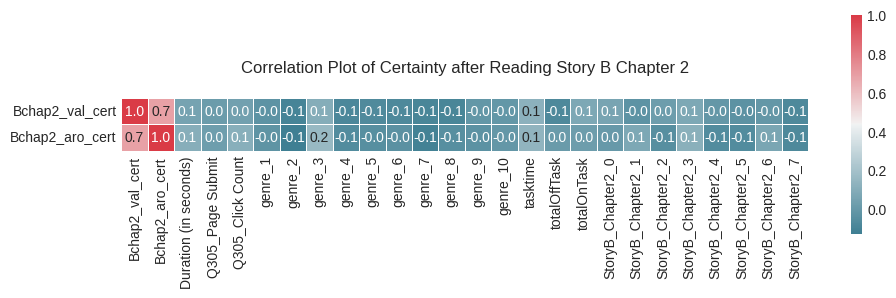

In [440]:
Bchap2_cert_static_factors = [
    'Bchap2_val_cert', 'Bchap2_aro_cert',

    "Duration (in seconds)",

    'Q305_Page Submit', 'Q305_Click Count',

    "genre_1", "genre_2", "genre_3", "genre_4", "genre_5",
    "genre_6", "genre_7", "genre_8", "genre_9", "genre_10",

    "tasktime", 'totalOffTask', 'totalOnTask',

    'StoryB_Chapter2_0',
    'StoryB_Chapter2_1',
    'StoryB_Chapter2_2',
    'StoryB_Chapter2_3',
    'StoryB_Chapter2_4',
    'StoryB_Chapter2_5',
    'StoryB_Chapter2_6',
    'StoryB_Chapter2_7'

]

title = "Correlation Plot of Certainty after Reading Story B Chapter 2\n"

get_corrplot(survey_raw[Bchap2_cert_static_factors].corr(method='pearson').iloc[0:2], (10,3), title, True)

### Certainty Progressive Correlations

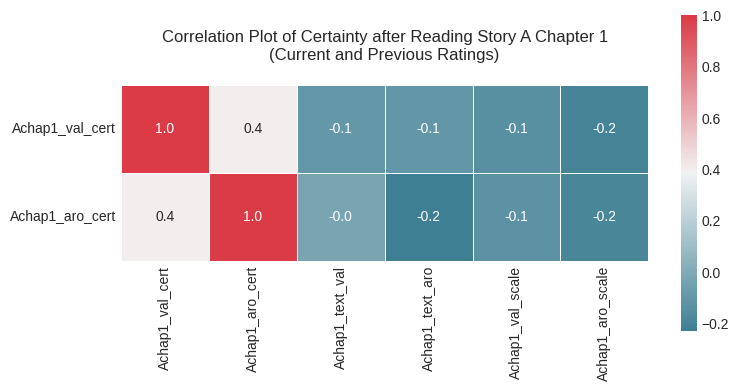

In [441]:
Achap1_cert_progress_factors = [
    'Achap1_val_cert', 'Achap1_aro_cert',

    'Achap1_text_val', 'Achap1_text_aro',
    'Achap1_val_scale', 'Achap1_aro_scale',
]

title = "Correlation Plot of Certainty after Reading Story A Chapter 1\n(Current and Previous Ratings)\n"

get_corrplot(survey_raw[Achap1_cert_progress_factors].corr(method='pearson').iloc[0:2], (8,4), title, True)

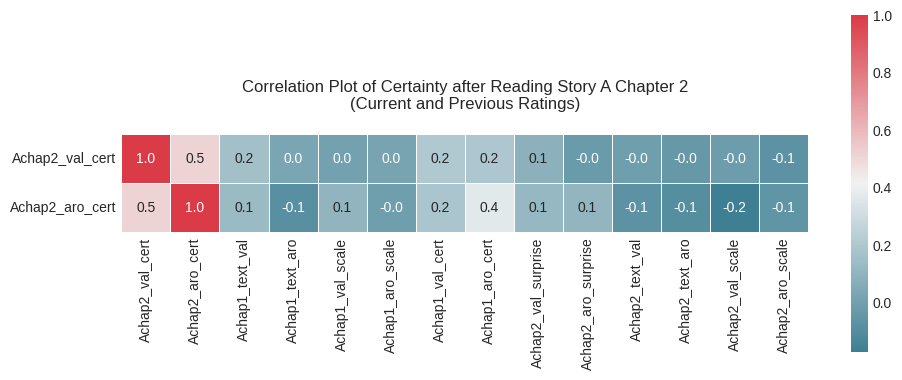

In [442]:
Achap2_cert_progress_factors = [
    'Achap2_val_cert', 'Achap2_aro_cert',

    'Achap1_text_val', 'Achap1_text_aro',
    'Achap1_val_scale', 'Achap1_aro_scale',
    'Achap1_val_cert', 'Achap1_aro_cert',

    'Achap2_val_surprise', 'Achap2_aro_surprise',
    'Achap2_text_val', 'Achap2_text_aro',
    'Achap2_val_scale', 'Achap2_aro_scale',
]

title = "Correlation Plot of Certainty after Reading Story A Chapter 2\n(Current and Previous Ratings)\n"

get_corrplot(survey_raw[Achap2_cert_progress_factors].corr(method='pearson').iloc[0:2], (10,4), title, True)

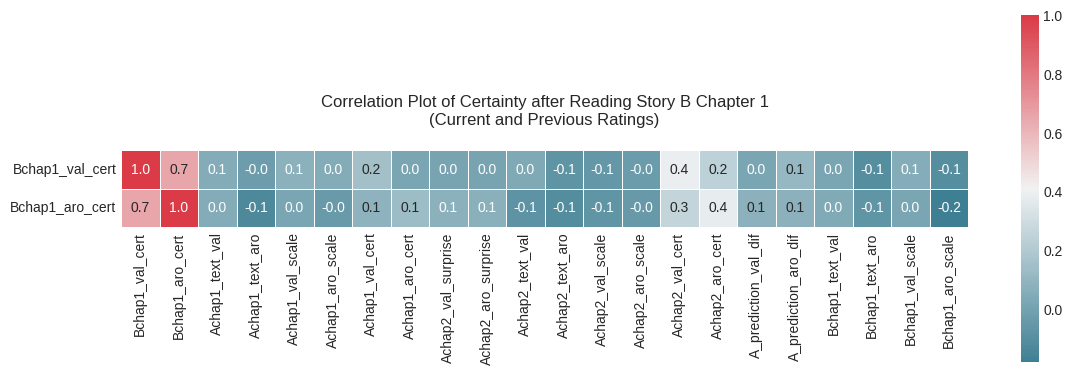

In [443]:
Bchap1_cert_progress_factors = [
    'Bchap1_val_cert', 'Bchap1_aro_cert',

    'Achap1_text_val', 'Achap1_text_aro',
    'Achap1_val_scale', 'Achap1_aro_scale',
    'Achap1_val_cert', 'Achap1_aro_cert',

    'Achap2_val_surprise', 'Achap2_aro_surprise',
    'Achap2_text_val', 'Achap2_text_aro',
    'Achap2_val_scale', 'Achap2_aro_scale',
    'Achap2_val_cert', 'Achap2_aro_cert',

    'A_prediction_val_dif', 'A_prediction_aro_dif',

    'Bchap1_text_val', 'Bchap1_text_aro',
    'Bchap1_val_scale', 'Bchap1_aro_scale',
]

title = "Correlation Plot of Certainty after Reading Story B Chapter 1\n(Current and Previous Ratings)\n"

get_corrplot(survey_raw[Bchap1_cert_progress_factors].corr(method='pearson').iloc[0:2], (12,4), title, True)

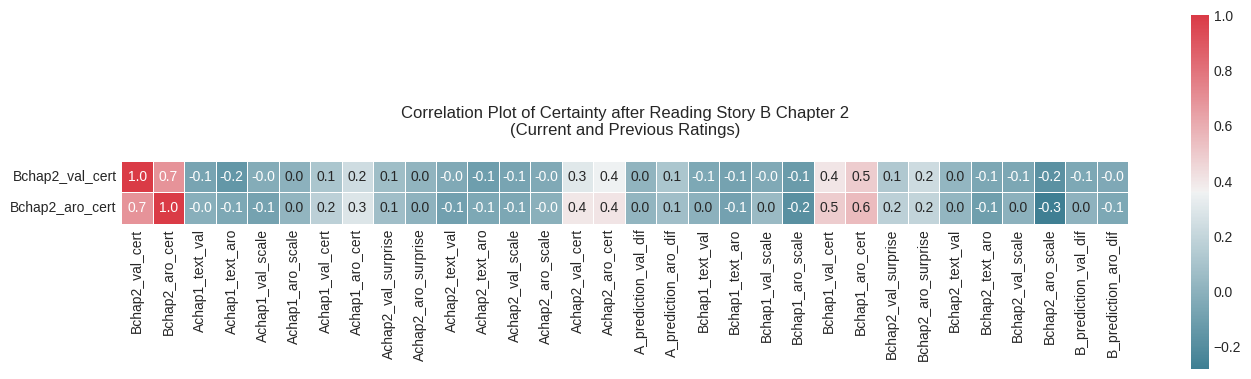

In [444]:
Bchap2_cert_progress_factors = [
    'Bchap2_val_cert', 'Bchap2_aro_cert',

    'Achap1_text_val', 'Achap1_text_aro',
    'Achap1_val_scale', 'Achap1_aro_scale',
    'Achap1_val_cert', 'Achap1_aro_cert',

    'Achap2_val_surprise', 'Achap2_aro_surprise',
    'Achap2_text_val', 'Achap2_text_aro',
    'Achap2_val_scale', 'Achap2_aro_scale',
    'Achap2_val_cert', 'Achap2_aro_cert',

    'A_prediction_val_dif', 'A_prediction_aro_dif',

    'Bchap1_text_val', 'Bchap1_text_aro',
    'Bchap1_val_scale', 'Bchap1_aro_scale',
    'Bchap1_val_cert', 'Bchap1_aro_cert',

    'Bchap2_val_surprise', 'Bchap2_aro_surprise',
    'Bchap2_text_val', 'Bchap2_text_aro',
    'Bchap2_val_scale', 'Bchap2_aro_scale',

    'B_prediction_val_dif', 'B_prediction_aro_dif'
]

title = "Correlation Plot of Certainty after Reading Story B Chapter 2\n(Current and Previous Ratings)\n"

get_corrplot(survey_raw[Bchap2_cert_progress_factors].corr(method='pearson').iloc[0:2], (14,4), title, True)

# Text Analysis

In [445]:
['StoryA_Chapter1',	'StoryA_Chapter2',	'StoryB_Chapter1',	'StoryB_Chapter2']

['StoryA_Chapter1', 'StoryA_Chapter2', 'StoryB_Chapter1', 'StoryB_Chapter2']

In [446]:
import torch
from transformers import BertTokenizer, BertModel

tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertModel.from_pretrained('bert-base-uncased')
model.eval()  # Set model to eval mode, we don't want it to train

def get_bert_embedding(text):
    inputs = tokenizer(text, return_tensors='pt', truncation=True, padding=True)
    with torch.no_grad():
        outputs = model(**inputs)
    # Use the [CLS] token representation
    cls_embedding = outputs.last_hidden_state[:, 0, :]
    return cls_embedding.squeeze().numpy()  # Convert to 1D array

In [447]:
chapter_embedding_mapping = {}

for col in ['StoryA_Chapter1',	'StoryA_Chapter2',	'StoryB_Chapter1',	'StoryB_Chapter2']:
    uniq_texts = survey_raw[col].unique()

    for text in uniq_texts:
        chapter_embedding_mapping[text] = get_bert_embedding(text)

chapter_embedding_mapping

{'Sasha‚Äôs small fingers trembled with excitement as she peeled away another strip of the faded wallpaper. She had discovered the corner of a door behind the peeling paper in the attic last week, and today she could no longer resist exploring further. With each tug, more of the wooden door was revealed, along with an old-fashioned keyhole that seemed to wink at her in the dim attic light. She wasn‚Äôt supposed to play up here alone, but something about the hidden door was too intriguing ‚Äî almost as if it was calling her.<br><br>\nAs thunder rumbled outside, Sasha pressed her ear against the cool, dusty wood. At first, she heard nothing but the thud of her own heartbeat. Then, ever so faintly, she caught what sounded like a whisper: her own name. Sasha‚Äôs breath hitched. She glanced over her shoulder, half expecting to find her older brother playing a prank, but the attic was empty except for shadows. Gathering her courage, she nudged the door. It didn‚Äôt budge, but a thin line of 

In [448]:
for col in ['StoryA_Chapter1',	'StoryA_Chapter2',	'StoryB_Chapter1',	'StoryB_Chapter2']:
    survey_raw[f'{col}_embedding'] = survey_raw[col].apply(lambda x: chapter_embedding_mapping[x])

Used ChatGPT to help develope the last_column_average_cosine_similarity() function.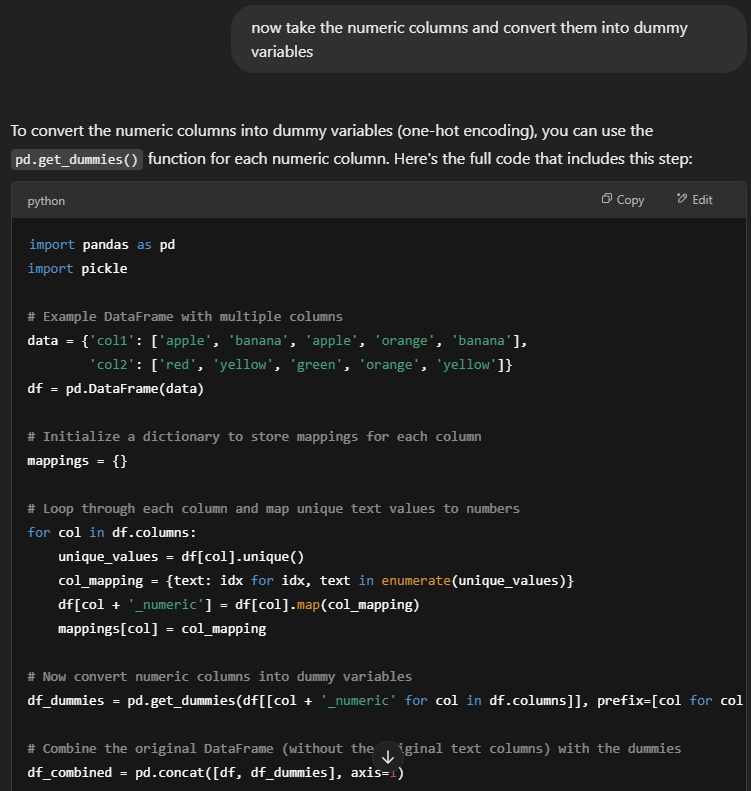

In [449]:
from sklearn.metrics.pairwise import cosine_similarity
import ast

def last_column_average_cosine_similarity(vectors):
    row_averages = []

    for row in vectors:
        # Convert string embeddings safely to numpy arrays
        embeddings = [np.array(ast.literal_eval(vec)) if isinstance(vec, str) else vec for vec in row]

        if len(embeddings) < 2:
            row_averages.append(0)
            continue

        target = embeddings[-1]
        total_similarity = 0
        count = 0

        for i in range(len(embeddings) - 1):
            sim = cosine_similarity([target], [embeddings[i]])[0][0]
            total_similarity += sim
            count += 1

        row_averages.append(total_similarity / count)

    return np.array(row_averages)

In [450]:
# Calculate running average
Achap2_vectors = survey_raw[['StoryA_Chapter1_embedding',	'StoryA_Chapter2_embedding']].values
survey_raw['Achap2_cosine_sim_avg'] = last_column_average_cosine_similarity(Achap2_vectors)

# Calculate running average
Bchap1_vectors = survey_raw[['StoryA_Chapter1_embedding',	'StoryA_Chapter2_embedding',	'StoryB_Chapter1_embedding']].values
survey_raw['Bchap1_cosine_sim_avg'] = last_column_average_cosine_similarity(Bchap1_vectors)

# Calculate running average
Bchap2_vectors = survey_raw[['StoryA_Chapter1_embedding',	'StoryA_Chapter2_embedding',	'StoryB_Chapter1_embedding',	'StoryB_Chapter2_embedding']].values
survey_raw['Bchap2_cosine_sim_avg'] = last_column_average_cosine_similarity(Bchap2_vectors)

<ipython-input-435-410ed7a0541e>:6: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  ax.get_figure().tight_layout()


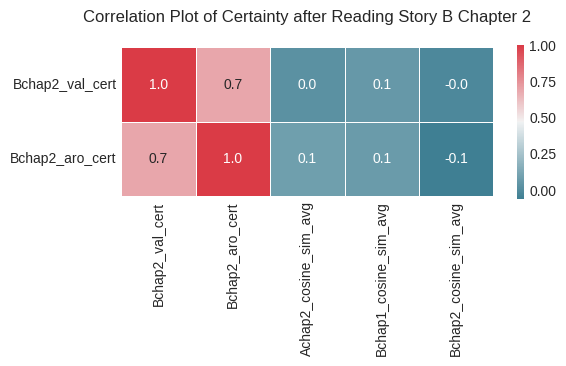

In [451]:
Bchap2_cert_factors = [
    'Bchap2_val_cert', 'Bchap2_aro_cert',

    'Achap2_cosine_sim_avg', 'Bchap1_cosine_sim_avg', 'Bchap2_cosine_sim_avg'
]

title = "Correlation Plot of Certainty after Reading Story B Chapter 2\n"

get_corrplot(survey_raw[Bchap2_cert_factors].corr(method='pearson').iloc[0:2], (6,2), title, True)

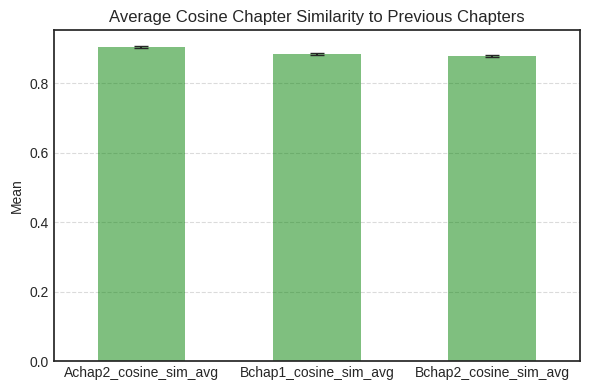

In [452]:
means = survey_raw[['Achap2_cosine_sim_avg', 'Bchap1_cosine_sim_avg', 'Bchap2_cosine_sim_avg']].mean()
sems = survey_raw[['Achap2_cosine_sim_avg', 'Bchap1_cosine_sim_avg', 'Bchap2_cosine_sim_avg']].sem()
CI95 = sems * 1.96  # 95% confidence interval

plt.figure(figsize=(6, 4))
means.plot(kind='bar', yerr=CI95, capsize=5, color='green', alpha=0.5)

plt.ylabel('Mean')
plt.title('Average Cosine Chapter Similarity to Previous Chapters')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

In [453]:
# Export for STATA
survey_raw[['Achap2_cosine_sim_avg', 'Bchap1_cosine_sim_avg', 'Bchap2_cosine_sim_avg']].to_excel(DIR + "survey_eval_task_cosine_sim.xlsx", index=False)